In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Charger les 3 feuilles du fichier Excel dans 3 DataFrames différents
df1 = pd.read_excel("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Parc Régionaux", engine="openpyxl", header=3)
df2 = pd.read_excel("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Distance", engine="openpyxl", header=4)
df3 = pd.read_excel("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Parcours annuel moyen", engine="openpyxl", header=4)

# Propager les valeurs non-NaN dans les colonnes VP, Unnamed: 1 et Unnamed: 2
df2['VP'] = df2['VP'].ffill()
df2['Unnamed: 1'] = df2['Unnamed: 1'].ffill()
df2['Unnamed: 2'] = df2['Unnamed: 2'].ffill()
df3['VP'] = df3['VP'].ffill()
df3['Unnamed: 1'] = df3['Unnamed: 1'].ffill()
df3['Unnamed: 2'] = df3['Unnamed: 2'].ffill()


df1.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_Dis.xlsx", index=False)
df2.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_PAM.xlsx", index=False)
df3.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_PR.xlsx", index=False)

In [11]:
# Afficher les premières lignes de chaque DataFrame pour vérifier
'''print("DF1:")
print(df1.head())
'''
'''
print("\nDF2:")
print(df2.head(15))

'''
print("\nDF3:")
print(df3.head())


DF3:
      VP Unnamed: 1                         Unnamed: 2          2011  \
0  Total      Total                              Total  12920.997408   
1  Total      Total           Electrique et\nhydrogène    6713.97194   
2  Total      Total                  Essence thermique   8394.515111   
3  Total      Total  Essence hybride\nnon rechargeable  16501.709719   
4  Total      Total      Essence hybride\nrechargeable  17703.285305   

           2012          2013          2014          2015          2016  \
0  12830.690278  12726.301855  12725.734852  12730.783291  12760.485575   
1   8822.039199   9066.831413   9307.099739   9673.830428   9818.331108   
2    8233.27699   8125.082885    8139.39222   8214.190897   8374.877599   
3  16062.130445  15996.441776  16159.738569  16292.929907  16292.106737   
4  17204.279421  16789.536979  16349.706069   16075.05933  15973.141154   

           2017          2018          2019          2020          2021  \
0  12658.732108  12516.418604  1256

In [12]:
# Extraire les lignes de 0 à 29
lignes_to_copy = df3.iloc[0:30]

# Insérer ces lignes après la ligne 29, donc dans les lignes 30 à 59
df_with_copied_rows = pd.concat([df3.iloc[:30], lignes_to_copy, df3.iloc[30:]]).reset_index(drop=True)

# Extraire les lignes de 30 à 59
df_lines_30_59 = df_with_copied_rows.iloc[30:60]

# Remplacer "Total" par "Moyennes régionales" dans la colonne "VP" (colonne 0) pour les lignes 30 à 59
df_lines_30_59.loc[:, 'VP'] = df_lines_30_59['VP'].replace('Total', 'Moyennes régionales')

# Diviser les valeurs des colonnes à partir de la 4ème colonne (incluse) par 20
df_lines_30_59 = df_lines_30_59.copy()
df_lines_30_59.loc[:, df_lines_30_59.columns[3:]] = df_lines_30_59.iloc[:, 3:] / 20



# Réinsérer ces lignes modifiées dans le DataFrame
df_with_modifications = pd.concat([df_with_copied_rows.iloc[:30], df_lines_30_59, df_with_copied_rows.iloc[60:]]).reset_index(drop=True)

#Afficher les premières lignes pour vérifier
print(df_with_copied_rows.iloc[25:60]) 

df_with_modifications.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_Dis_V2.xlsx", index=False)

                     VP      Unnamed: 1                         Unnamed: 2  \
25                Total    particuliers                   Diesel thermique   
26                Total    particuliers   Diesel hybride non\nrechargeable   
27                Total    particuliers       Diesel hybride\nrechargeable   
28                Total    particuliers                                Gaz   
29                Total    particuliers                      Non déterminé   
30  Moyennes régionales           Total                              Total   
31  Moyennes régionales           Total           Electrique et\nhydrogène   
32  Moyennes régionales           Total                  Essence thermique   
33  Moyennes régionales           Total  Essence hybride\nnon rechargeable   
34  Moyennes régionales           Total      Essence hybride\nrechargeable   
35  Moyennes régionales           Total                   Diesel thermique   
36  Moyennes régionales           Total   Diesel hybride non\nre

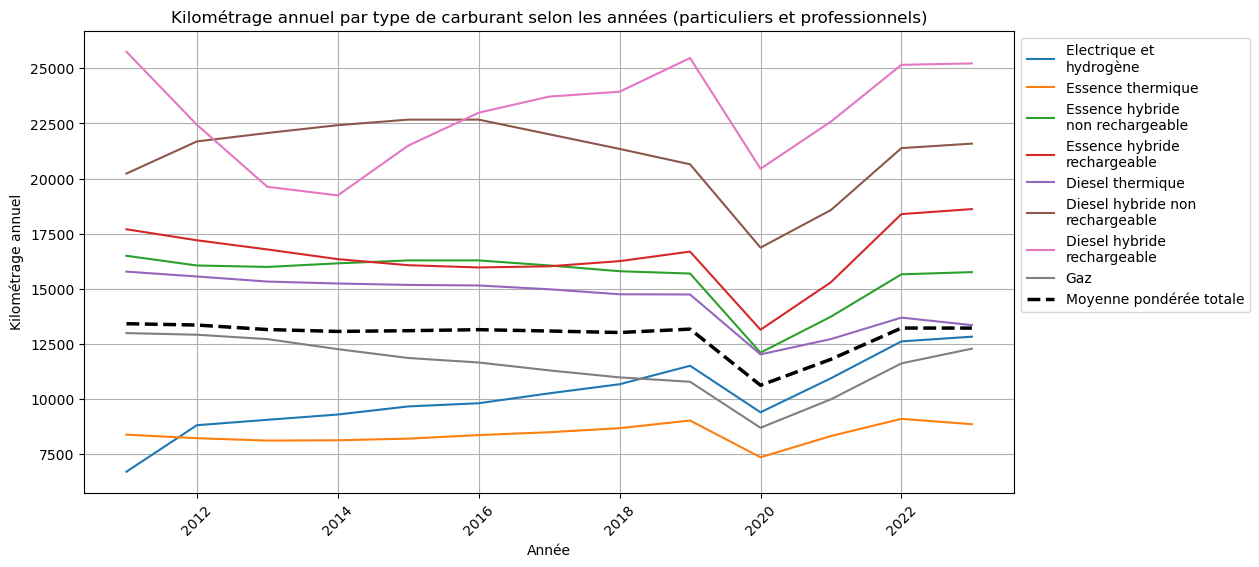

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données dans un DataFrame
df_km_tot = df_with_modifications.iloc[:10].reset_index(drop=True)

# Renommer les colonnes pour éviter les "Unnamed"
df_km_tot.rename(columns={"Unnamed: 1": "Statut", "Unnamed: 2": "Carburant"}, inplace=True)

# Filtrer pour exclure la ligne "Total" et "Non déterminé" dans la colonne "Carburant"
df_km_tot = df_km_tot[df_km_tot["Carburant"] != "Total"]
df_km_tot = df_km_tot[df_km_tot["Carburant"] != "Non déterminé"]

# Sélectionner les années (colonnes à partir de la 4ᵉ colonne)
years = df_km_tot.columns[3:]

# Dictionnaire des nombres de véhicules par type de carburant
nb_vehicules = {
    'Diesel thermique': 4445,
    'Essence thermique': 3610,
    'Gaz': 2422,
    'Essence hybride\nnon rechargeable': 1482,
    'Electrique et\nhydrogène': 1244,
    'Essence hybride\nrechargeable': 902,
    'Diesel hybride\nrechargeable': 425,
    'Diesel hybride non\nrechargeable': 496
}

# Calcul de la moyenne pondérée totale pour chaque année
moyenne_ponderee_totale = []

for year in years:
    numerateur = 0
    denominateur = 0

    for _, row in df_km_tot.iterrows():
        carburant = row["Carburant"]
        if carburant in nb_vehicules:
            numerateur += row[year] * nb_vehicules[carburant]
            denominateur += nb_vehicules[carburant]

    moyenne_ponderee_totale.append(numerateur / denominateur if denominateur != 0 else 0)

# 🔹 Tracer les courbes pour chaque carburant
plt.figure(figsize=(12, 6))

for _, row in df_km_tot.iterrows():
    plt.plot(years, row[3:].values, label=row["Carburant"])  # Tracer chaque ligne

# 🔹 Ajouter la courbe de la moyenne pondérée totale
plt.plot(years, moyenne_ponderee_totale, label="Moyenne pondérée totale",
         linestyle="--", color="black", linewidth=2.5)

# Personnalisation du graphique
plt.xlabel("Année")
plt.ylabel("Kilométrage annuel")
plt.title("Kilométrage annuel par type de carburant selon les années (particuliers et professionnels)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Légende en dehors du graphe
plt.xticks(rotation=45)  # Rotation des années pour lisibilité
plt.grid(True)

# Afficher le graphique
plt.show()

On regroupe par type de véhicule : 
- électriques et hydrogènes --> VE
- essence et diesel rechargeable --> VHR
- le reste sans Non déterminé --> Thermiques 
Pour regrouper, on fait des moyennes pondérées du kilométrage par le nombre de voiture de chaque type.
Par exemple pour avoir la moyenne sur les VHR : on calcule la moyenne des kilométrages des véhicules à essence hybride rechargeable et diesel hybride rechargeable pondérée par le nombre de véhicule de chaque type.


In [14]:
df1['Carburant'].value_counts()

Carburant
Diesel thermique                    4445
Essence thermique                   3610
Gaz                                 2422
Non déterminé                       1641
Essence hybride non rechargeable    1482
Electrique et hydrogène             1244
Essence hybride rechargeable         902
Diesel hybride non rechargeable      496
Diesel hybride rechargeable          425
Name: count, dtype: int64

In [15]:
import pandas as pd

# Dictionnaire des nombres de véhicules
nb_vehicules = {
    'Diesel thermique': 4445,
    'Essence thermique': 3610,
    'Gaz': 2422,
    'Essence hybride\nnon rechargeable': 1482,
    'Electrique et\nhydrogène': 1244,
    'Essence hybride\nrechargeable': 902,
    'Diesel hybride\nrechargeable': 425,
    'Diesel hybride non\nrechargeable': 496
}

# Définir les années
annees = list(range(2011, 2024))

# Initialiser le DataFrame résultat
resultats = pd.DataFrame(index=['VE', 'VHR', 'Thermiques'], columns=annees)

# Pour chaque année
for annee in annees:
    # VE (Electrique et hydrogène)
    resultats.loc['VE', annee] = df3[df3['Unnamed: 2'] == 'Electrique et\nhydrogène'][annee].values[0]
    
    # VHR (moyenne pondérée des rechargeables)
    km_essence_rech = df3[df3['Unnamed: 2'] == 'Essence hybride\nrechargeable'][annee].values[0]
    km_diesel_rech = df3[df3['Unnamed: 2'] == 'Diesel hybride\nrechargeable'][annee].values[0]
    
    resultats.loc['VHR', annee] = (
        (km_essence_rech * nb_vehicules['Essence hybride\nrechargeable'] +
         km_diesel_rech * nb_vehicules['Diesel hybride\nrechargeable']) /
        (nb_vehicules['Essence hybride\nrechargeable'] + 
         nb_vehicules['Diesel hybride\nrechargeable'])
    )
    
    # Thermiques (le reste)
    types_thermiques = [
        'Diesel thermique', 
        'Essence thermique',
        'Gaz',
        'Essence hybride\nnon rechargeable',
        'Diesel hybride non\nrechargeable'
    ]
    
    numerateur = sum(
        df3[df3['Unnamed: 2'] == type_][annee].values[0] * nb_vehicules[type_]
        for type_ in types_thermiques
    )
    denominateur = sum(nb_vehicules[type_] for type_ in types_thermiques)
    
    resultats.loc['Thermiques', annee] = numerateur / denominateur

# 🔹 Ajout de la ligne Moyenne pondérée totale
total_vehicules = sum(nb_vehicules.values())

for annee in annees:
    resultats.loc['Moyenne Totale', annee] = (
        (resultats.loc['VE', annee] * nb_vehicules['Electrique et\nhydrogène'] +
         resultats.loc['VHR', annee] * 
         (nb_vehicules['Essence hybride\nrechargeable'] + nb_vehicules['Diesel hybride\nrechargeable']) +
         resultats.loc['Thermiques', annee] * 
         sum(nb_vehicules[type_] for type_ in types_thermiques))
        / total_vehicules
    )

# 🔹 Afficher les résultats
print(resultats)

                        2011          2012          2013          2014  \
VE                6713.97194   8822.039199   9066.831413   9307.099739   
VHR             20280.977163  18881.285201  17698.845435  17275.279393   
Thermiques      13362.748003  13228.440255  13083.715058  13001.933434   
Moyenne Totale  13423.270609  13362.858086  13158.736671  13073.433299   

                        2015          2016          2017          2018  \
VE               9673.830428   9818.331108  10266.440936  10679.443491   
VHR             17811.312013  18219.406237  18488.735003  18719.272346   
Thermiques      12948.455998  12946.253238  12799.124091  12652.093436   
Moyenne Totale  13106.806572  13152.984164  13091.913645   13024.59243   

                        2019          2020          2021          2022  \
VE              11516.889416   9407.754901  10951.351778  12622.126829   
VHR             19501.430306  15487.034914  17635.866345  20559.062928   
Thermiques      12670.683152  10236.

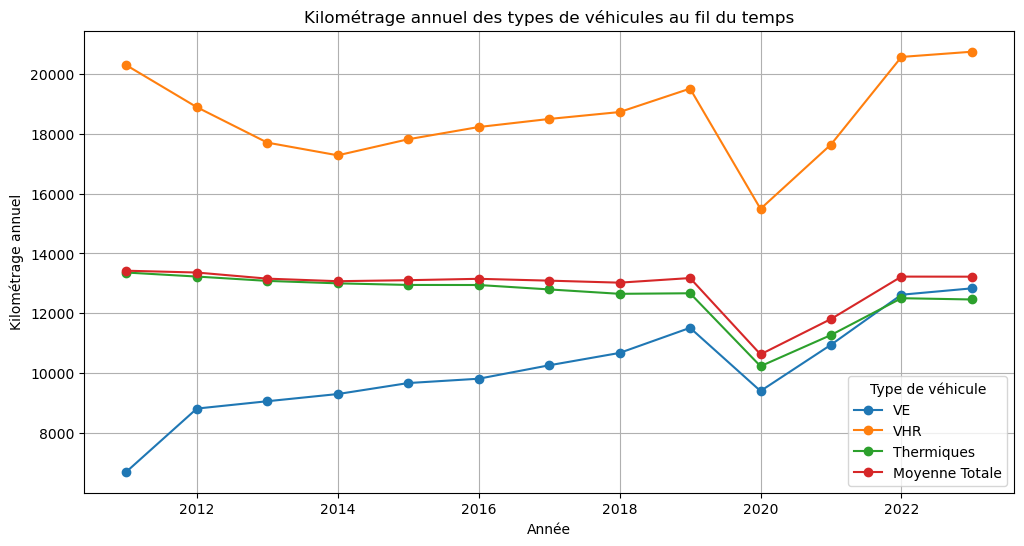

In [16]:
import matplotlib.pyplot as plt

# Ton DataFrame (resultats)
resultats.T.plot(figsize=(12, 6), marker='o', linestyle='-')

# Ajouter des labels et un titre
plt.xlabel("Année")
plt.ylabel("Kilométrage annuel")
plt.title("Kilométrage annuel des types de véhicules au fil du temps")
plt.legend(title="Type de véhicule")
plt.grid(True)

# Afficher le graphique
plt.show()

In [17]:
df1['Carburant'].unique()

array(['Diesel hybride non rechargeable', 'Diesel hybride rechargeable',
       'Diesel thermique', 'Electrique et hydrogène',
       'Essence hybride non rechargeable', 'Essence hybride rechargeable',
       'Essence thermique', 'Gaz', 'Non déterminé'], dtype=object)

In [18]:
def transform_dataframes(df1_long, df3_long):
    # Mapping pour harmoniser les valeurs
    region_mapping = {
        'Inconnu': 'Inconnue',
        "Provence-Alpes-Côte\nd'Azur": "Provence-Alpes-Côte d'Azur"
    }
    
    carburant_mapping = {
        'Electrique et\nhydrogène': 'Electrique et hydrogène',
        'Essence hybride\nnon rechargeable': 'Essence hybride non rechargeable', 
        'Essence hybride\nrechargeable': 'Essence hybride rechargeable',
        'Diesel hybride non\nrechargeable': 'Diesel hybride non rechargeable',
        'Diesel hybride\nrechargeable': 'Diesel hybride rechargeable'
    }
    
    statut_mapping = {
        'professionnels': 'Professionnel', 
        'particuliers': 'Particulier'
    }
    
    # Appliquer les mappings
    df1_long['Région de résidence'] = df1_long['Région de résidence'].replace(region_mapping)
    df3_long['Région de résidence'] = df3_long['Région de résidence'].replace(region_mapping)
    
    df1_long['Carburant'] = df1_long['Carburant'].replace(carburant_mapping)
    df3_long['Carburant'] = df3_long['Carburant'].replace(carburant_mapping)
    
    df1_long['Statut de l\'utilisateur'] = df1_long['Statut de l\'utilisateur'].replace(statut_mapping)
    df3_long['Statut de l\'utilisateur'] = df3_long['Statut de l\'utilisateur'].replace(statut_mapping)
    
    # Filtrer les lignes "Total"
    df1_long = df1_long[df1_long['Région de résidence'] != 'Total']
    df3_long = df3_long[df3_long['Région de résidence'] != 'Total']
    df1_long = df1_long[df1_long['Carburant'] != 'Total']
    df3_long = df3_long[df3_long['Carburant'] != 'Total']
    df1_long = df1_long[df1_long['Statut de l\'utilisateur'] != 'Total']
    df3_long = df3_long[df3_long['Statut de l\'utilisateur'] != 'Total']
    
    # Fusionner les DataFrames
    df_final = df1_long.merge(
        df3_long, 
        on=['Année', 'Région de résidence', 'Statut de l\'utilisateur', 'Carburant'],
        how='inner'
    )
    
    # Sélectionner et renommer les colonnes
    df_final = df_final[[
        'Année', 'Région de résidence', 'Statut de l\'utilisateur', 
        'Carburant', 'Nombre de véhicules', 'Kilométrage'
    ]]

    df_final = df_final[df_final["Carburant"] != "Non déterminé"]
    
    return df_final

# Exemple d'utilisation
import pandas as pd

# Supposons que df1 et df3 soient déjà chargés

# Suppression de la colonne 2024 si présente dans df1
df1 = df1.drop(columns=[2024], errors='ignore')

# Renommage des colonnes de df3 pour harmonisation
df3 = df3.rename(columns={
    'VP': 'Région de résidence',
    'Unnamed: 1': "Statut de l'utilisateur",
    'Unnamed: 2': 'Carburant'
})

# Suppression des lignes contenant "Total"
df1 = df1[~df1['Région de résidence'].str.contains("Total", na=False)]
df3 = df3[~df3['Région de résidence'].str.contains("Total", na=False)]
df3 = df3[~df3['Carburant'].str.contains("Total", na=False)]

# Nettoyage des espaces et caractères spéciaux
df1['Région de résidence'] = df1['Région de résidence'].str.strip()
df3['Région de résidence'] = df3['Région de résidence'].str.strip()

df1['Carburant'] = df1['Carburant'].str.replace(r'\s+', ' ', regex=True)
df3['Carburant'] = df3['Carburant'].str.replace(r'\s+', ' ', regex=True)

# Transformation des DataFrames en format long
df1_long = df1.melt(
    id_vars=['Région de résidence', 'Code région de résidence', 'Carburant', 'Âge', 'Statut de l\'utilisateur', 'Crit\'Air'], 
    var_name='Année', value_name='Nombre de véhicules'
)

df3_long = df3.melt(
    id_vars=['Région de résidence', 'Statut de l\'utilisateur', 'Carburant'],
    var_name='Année', value_name='Kilométrage'
)

# Conversion des années en string pour correspondance
df1_long['Année'] = df1_long['Année'].astype(str)
df3_long['Année'] = df3_long['Année'].astype(str)

# Affichage rapide pour vérifier
print(df1_long.head())
print(df3_long.head())

# Maintenant tu peux appliquer :
df_final = transform_dataframes(df1_long, df3_long)

  Région de résidence  Code région de résidence  \
0            Inconnue                         0   
1            Inconnue                         0   
2            Inconnue                         0   
3            Inconnue                         0   
4            Inconnue                         0   

                         Carburant    Âge Statut de l'utilisateur Crit'Air  \
0  Diesel hybride non rechargeable   0 an             Particulier        2   
1  Diesel hybride non rechargeable   0 an           Professionnel        2   
2  Diesel hybride non rechargeable   1 an             Particulier        2   
3  Diesel hybride non rechargeable   1 an           Professionnel        2   
4  Diesel hybride non rechargeable  2 ans             Particulier        2   

  Année  Nombre de véhicules  
0  2011                  0.0  
1  2011                  0.0  
2  2011                  0.0  
3  2011                  0.0  
4  2011                  0.0  
  Région de résidence Statut de l'util

In [19]:
df_final
df_final.to_csv("/home/onyxia/work/Statapp/Bases/df_parc_kilometrage_statut.xlsx")

In [20]:
df_final['Carburant'].unique()

array(['Diesel hybride non rechargeable', 'Diesel hybride rechargeable',
       'Diesel thermique', 'Electrique et hydrogène',
       'Essence hybride non rechargeable', 'Essence hybride rechargeable',
       'Essence thermique', 'Gaz'], dtype=object)

In [21]:
df1_long = df1_long[['Région de résidence', "Statut de l'utilisateur", 'Carburant', 'Année', 'Nombre de véhicules']]

In [22]:
# Regrouper les carburants par type de véhicule
def categoriser_carburant(carburant):
    if carburant in ['Electrique et hydrogène']:
        return 'VE'  # Véhicule Electrique ou Hydrogène
    elif carburant in ['Essence hybride rechargeable', 'Diesel hybride rechargeable']:
        return 'VHR'  # Véhicule Hybride Rechargeable
    else:
        return 'Thermiques'  # Véhicule thermique

# Appliquer la fonction de catégorisation à la colonne 'Carburant'
df_final['Type de véhicule'] = df_final['Carburant'].apply(categoriser_carburant)

# Regrouper les carburants par type de véhicule
def categoriser_carburant(carburant):
    if carburant in ['Electrique et hydrogène']:
        return 'VE'  # Véhicule Electrique ou Hydrogène
    elif carburant in ['Essence hybride rechargeable', 'Diesel hybride rechargeable']:
        return 'VHR'  # Véhicule Hybride Rechargeable
    else:
        return 'Thermiques'  # Véhicule thermique

# Appliquer la fonction de catégorisation à la colonne 'Carburant'
df_final['Type de véhicule'] = df_final['Carburant'].apply(categoriser_carburant)

In [23]:
df_final
df_final.to_csv("/home/onyxia/work/Statapp/Bases/df_parc_kilometrage_statut.xlsx")

In [25]:
# Convertir en nombres pour éviter les erreurs de type
df_final["Kilométrage"] = pd.to_numeric(df_final["Kilométrage"], errors="coerce")
df_final["Nombre de véhicules"] = pd.to_numeric(df_final["Nombre de véhicules"], errors="coerce")

/tmp/ipykernel_4185/3292166348.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_final.groupby(groupby_var).apply(
/tmp/ipykernel_4185/3292166348.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_annee["Année"], rotation=45)
/tmp/ipykernel_4185/3292166348.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after group

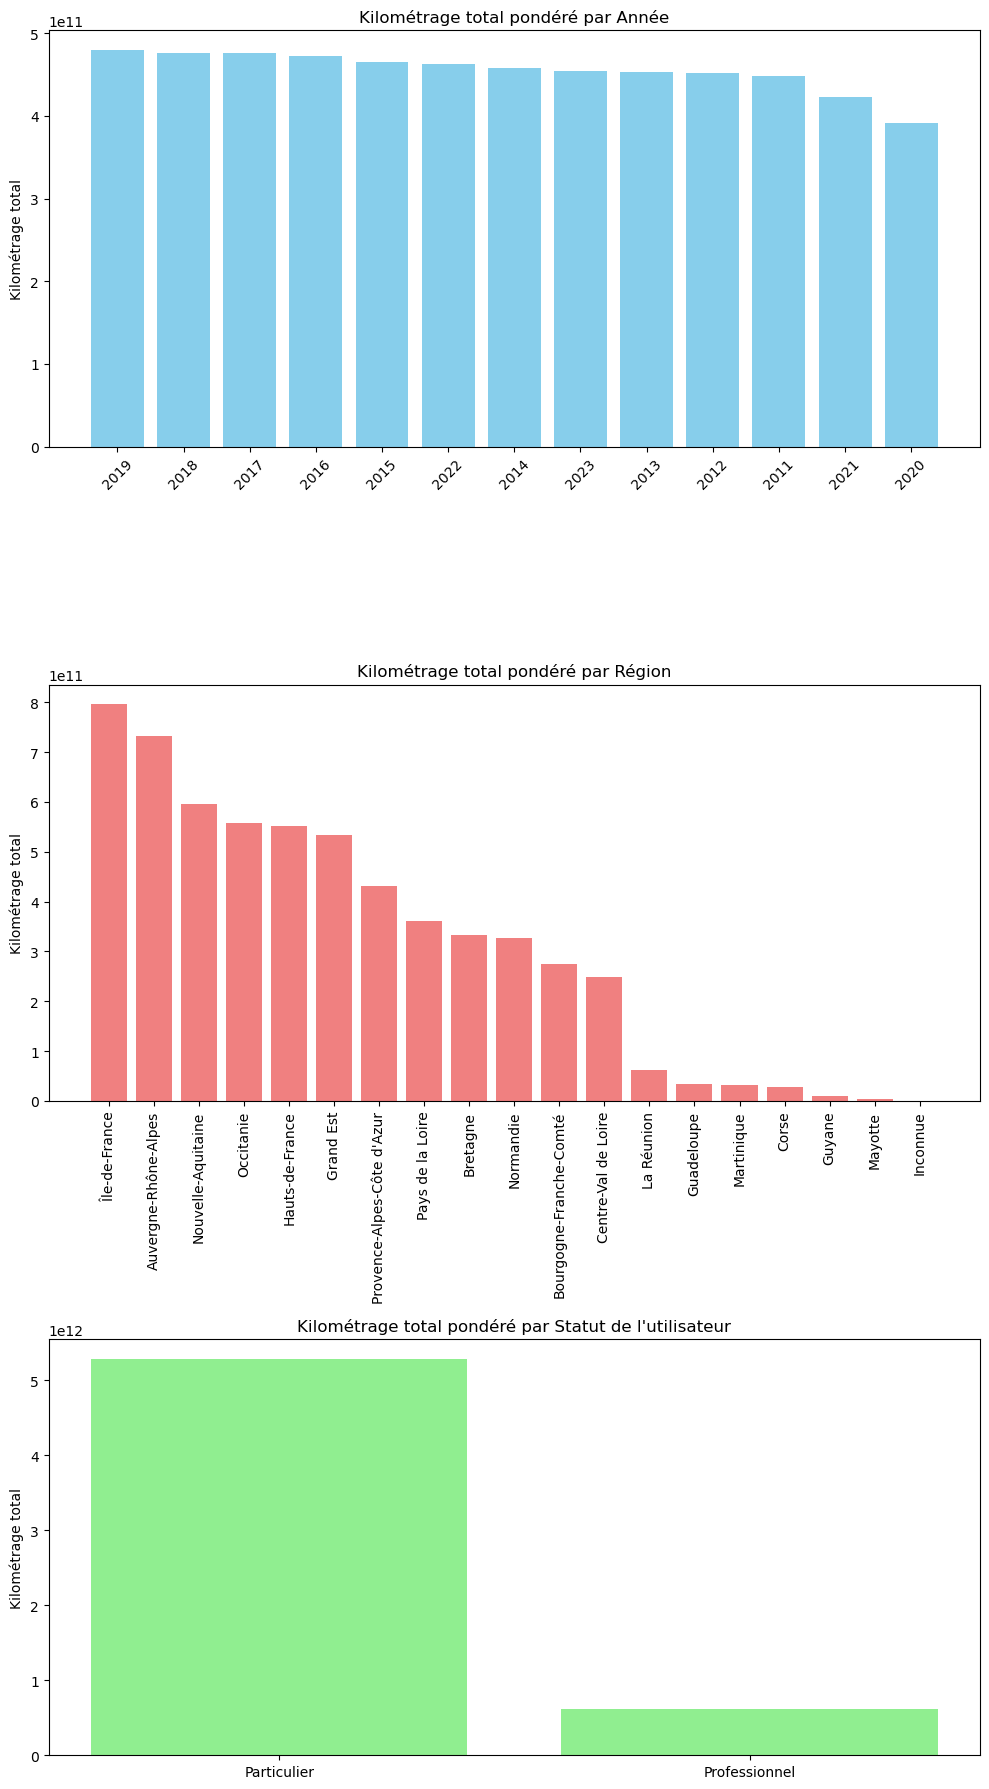

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour calculer les métriques et tracer les histogrammes
def plot_kilometrage(df_final):
    # Calcul des métriques
    def compute_metrics(groupby_var):
        df_grouped = df_final.groupby(groupby_var).apply(
            lambda x: pd.Series({
                "Kilométrage total pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum(),
                "Kilométrage moyen pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum() / x["Nombre de véhicules"].sum()
            })
        ).reset_index()
        return df_grouped.sort_values("Kilométrage total pondéré", ascending=False)

    # Création des plots
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))

    # 1️⃣ Histogramme par Année
    df_annee = compute_metrics("Année")
    axes[0].bar(df_annee["Année"], df_annee["Kilométrage total pondéré"], color='skyblue')
    axes[0].set_title("Kilométrage total pondéré par Année")
    axes[0].set_ylabel("Kilométrage total")
    axes[0].set_xticklabels(df_annee["Année"], rotation=45)

    # 2️⃣ Histogramme par Région
    df_region = compute_metrics("Région de résidence")
    axes[1].bar(df_region["Région de résidence"], df_region["Kilométrage total pondéré"], color='lightcoral')
    axes[1].set_title("Kilométrage total pondéré par Région")
    axes[1].set_ylabel("Kilométrage total")
    axes[1].set_xticklabels(df_region["Région de résidence"], rotation=90)

    # 3️⃣ Histogramme par Statut d'utilisateur
    df_statut = compute_metrics("Statut de l'utilisateur")
    axes[2].bar(df_statut["Statut de l'utilisateur"], df_statut["Kilométrage total pondéré"], color='lightgreen')
    axes[2].set_title("Kilométrage total pondéré par Statut de l'utilisateur")
    axes[2].set_ylabel("Kilométrage total")

    # Affichage des graphes
    plt.tight_layout()
    plt.show()

# Appel de la fonction avec ton DataFrame final
plot_kilometrage(df_final)